## Correlation, Heat Map

Pearsons R formula of correlation
$$
r(x,y) = \frac{1}{n-1} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s_x} \right) \left( \frac{y_i - \bar{y}}{s_y} \right)
$$
Properties
1. r(x,y)=r(y,x) & r(x,y)=r(y,x) (symmetric);
2. r(x,y), r(x,y) is always between -1 and 1 (bounded from below and above);
3. r(x,y)=1, r(x,y)=1 if and only if y=ax+by=ax+b for some a>0  and b;
4. r(x,y)=−1,r(x,y)=−1 if and only if y=ax+by=ax+b for some a<0 and b;

In [2]:
import numpy as np
import pandas as pd
body = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv",
    comment="#")
body = body.to_numpy()  # data frames will be covered later
body.shape

(4221, 7)

In [3]:
#Manually
x = body[:, 4]  # arm circumference
y = body[:, 5]  # hip circumference
x_std = (x-np.mean(x))/np.std(x, ddof=1)
y_std = (y-np.mean(y))/np.std(y, ddof=1)
np.sum(x_std*y_std)/(len(x)-1)

0.8680627457873239

In [4]:
#directly
import scipy.stats
scipy.stats.pearsonr(x, y)[0]  # returns more than we ask for

0.8680627457873238

In [5]:
def plot_corr(x, y):
    r = scipy.stats.pearsonr(x, y)[0]
    ρ = scipy.stats.spearmanr(x, y)[0]
    plt.scatter(x, y, label=f"r = {r:.3}\nρ = {ρ:.3}")
    plt.legend()

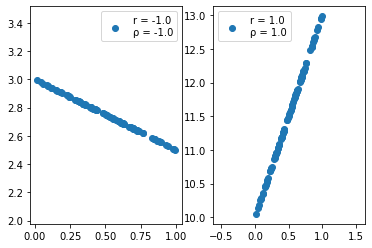

In [9]:
import matplotlib.pyplot as plt
np.random.seed(123)
x = np.random.rand(100)
plt.subplot(121)
plot_corr(x, -0.5*x+3)  # negative slope
plt.axis("equal")
plt.subplot(122)
plot_corr(x, 3*x+10)  # positive slope
plt.axis("equal")
plt.show()

Corelation Heat Map

In [15]:
import seaborn as sns

In [16]:
C = np.corrcoef(body.T)
np.round(C,2)

array([[ 1.  ,  0.35,  0.55,  0.19,  0.91,  0.95,  0.9 ],
       [ 0.35,  1.  ,  0.67,  0.66,  0.15,  0.2 ,  0.13],
       [ 0.55,  0.67,  1.  ,  0.48,  0.45,  0.46,  0.43],
       [ 0.19,  0.66,  0.48,  1.  ,  0.08,  0.1 , -0.03],
       [ 0.91,  0.15,  0.45,  0.08,  1.  ,  0.87,  0.85],
       [ 0.95,  0.2 ,  0.46,  0.1 ,  0.87,  1.  ,  0.9 ],
       [ 0.9 ,  0.13,  0.43, -0.03,  0.85,  0.9 ,  1.  ]])

In [26]:
np.triu(C)                                                             #to keep only the lower bound records
np.triu(C,1)                                                           #to keep only the lower bounds and diagonal mark as 0
np.round(np.triu(C,1),2)                                               #to keep only the lower bounds and diagonal mark as 0 and round to 2
np.abs(np.round(np.triu(C,1),2))                                       #absolute of the above data set
np.max(np.abs(np.round(np.triu(C,1),2)))                               #max of the whole data set
np.unravel_index(np.argmax(np.abs(np.round(np.triu(C,1),2))), C.shape) # position of the max value

(0, 5)

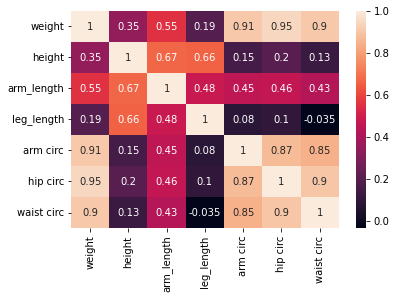

In [17]:
cols= np.array(["weight", "height", "arm_length", 
                "leg_length","arm circ", "hip circ", "waist circ"])
sns.heatmap(C,xticklabels = cols,yticklabels = cols , annot = True)
plt.show()  ##Darker the color, smaller the correlation

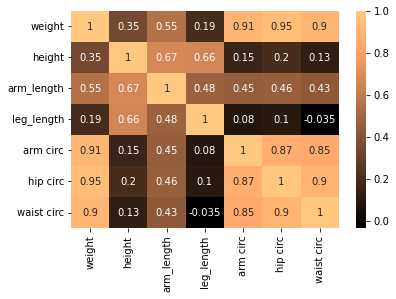

In [28]:
from matplotlib import cm
clr = cm.get_cmap("copper")
cols= np.array(["weight", "height", "arm_length", 
                "leg_length","arm circ", "hip circ", "waist circ"])
sns.heatmap(C,xticklabels = cols,yticklabels = cols , annot = True,cmap = clr)
plt.show()  ##Darker the color, smaller the correlation

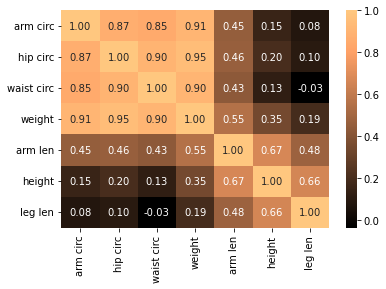

In [42]:
order = [4, 5, 6, 0, 2, 1, 3]
cols = np.array(["weight", "height", "arm len",
    "leg len", "arm circ", "hip circ", "waist circ"])
C = np.corrcoef(body.T)
sns.heatmap(
    C[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("copper")
)
plt.show()

# Spearman's Rho
## Monotonic correlation
$\rho$

In [32]:
scipy.stats.rankdata([10,30,70,40,20,50])

array([1., 3., 6., 4., 2., 5.])

In [41]:
x= body[:,4]
y = body[:,5]
scipy.stats.pearsonr(x,y)[0]
scipy.stats.pearsonr(scipy.stats.rankdata(x),scipy.stats.rankdata(y))[0]
#or 
scipy.stats.spearmanr(x,y)[0]

0.873839031167527

## Heat map on Spearman Rho data

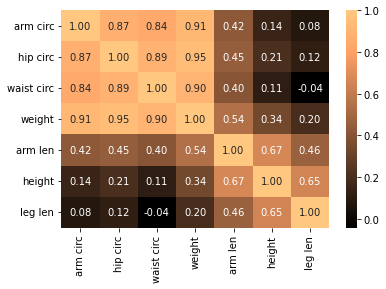

In [45]:
order = [4, 5, 6, 0, 2, 1, 3]
cols = np.array(["weight", "height", "arm len",
    "leg len", "arm circ", "hip circ", "waist circ"])
C = np.corrcoef(scipy.stats.rankdata(body,axis = 0).T)
sns.heatmap(
    C[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("copper")
)
plt.show()